In [85]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d


def cal_luminance(img: np.array) -> np.array:
    """
    :param img: Assumes img --> R->0, G->1, B->2
    :return: L
    """
    return .2126 * img[:, :, 0] + .7152 * img[:, :, 2] + .0722 * img[:, :, 1]


def light_source_detection(rgb_img: np.array, num, iters: int =10):
    high_luminance_pixel_points = set()
    
    for iter in range(iters):
        L = cal_luminance(rgb_img)

        size=int(np.round(.001*L.shape[0]*L.shape[1]))
        col, row = np.random.randint(0, L.shape[1], size=size), np.random.randint(0, L.shape[0], size=size)

        l_max = L[row, col].max()
        indices = np.where(L[row, col] == l_max)
        high_luminance_pixel_points |= set(tuple(zip(row[indices], col[indices])))
    
    hull = []
    points = np.array(list(high_luminance_pixel_points))
    hull.append(ConvexHull(points))
    for simplex in hull[0].simplices:
        plt.imshow(cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB))
        plt.plot(points[simplex, 1], points[simplex, 0], 'k-')
    plt.axis('off')
    plt.savefig('num%d.png'%num)
    plt.show()

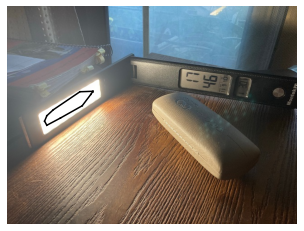

In [86]:
im = cv2.imread('./test3.png')

light_source_detection(im, 6)

In [75]:
im

array([[[175, 147, 112],
        [177, 149, 114],
        [195, 166, 129],
        ...,
        [ 41,  76, 102],
        [ 42,  77, 103],
        [ 39,  74, 100]],

       [[188, 160, 125],
        [196, 168, 133],
        [174, 147, 110],
        ...,
        [ 39,  74, 100],
        [ 40,  75, 101],
        [ 38,  73,  99]],

       [[193, 167, 130],
        [183, 157, 120],
        [189, 163, 126],
        ...,
        [ 39,  74, 100],
        [ 40,  75, 101],
        [ 40,  75, 101]],

       ...,

       [[ 62,  74,  92],
        [ 58,  70,  88],
        [ 89, 103, 121],
        ...,
        [ 12,  22,  40],
        [ 11,  21,  39],
        [ 10,  20,  38]],

       [[ 62,  72,  90],
        [ 66,  78,  96],
        [ 68,  82, 100],
        ...,
        [  9,  19,  37],
        [  9,  19,  37],
        [  7,  17,  35]],

       [[ 78,  88, 106],
        [ 83,  95, 113],
        [ 73,  87, 105],
        ...,
        [  5,  15,  33],
        [  8,  18,  36],
        [  9,  19,  37]]